In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_diabetes = pd.read_csv('C:/Users/JAVA COM/Documents/Data Mining/diabetes.csv')

In [3]:
data_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data_diabetes.shape

(768, 9)

In [6]:
data_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data_diabetes.fillna(data_diabetes.mean(), inplace=True)

In [8]:
Q1 = data_diabetes.quantile(0.25)
Q3 = data_diabetes.quantile(0.75)
IQR = Q3 - Q1
data_diabetes = data_diabetes[~((data_diabetes < (Q1 - 1.5 * IQR)) | (data_diabetes > (Q3 + 1.5 * IQR))).any(axis=1)]

In [9]:
data_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.00000,639.000000,639.000000,639.000000
mean,3.804382,119.112676,72.120501,20.563380,65.931142,32.00579,0.429177,32.715180,0.312989
std,3.260995,29.162175,11.348686,15.339991,79.569482,6.43397,0.250957,11.080651,0.464073
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.30000,0.242000,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,37.000000,32.00000,0.358000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,120.000000,35.95000,0.586000,40.000000,1.000000
max,13.000000,198.000000,106.000000,60.000000,318.000000,50.00000,1.191000,66.000000,1.000000


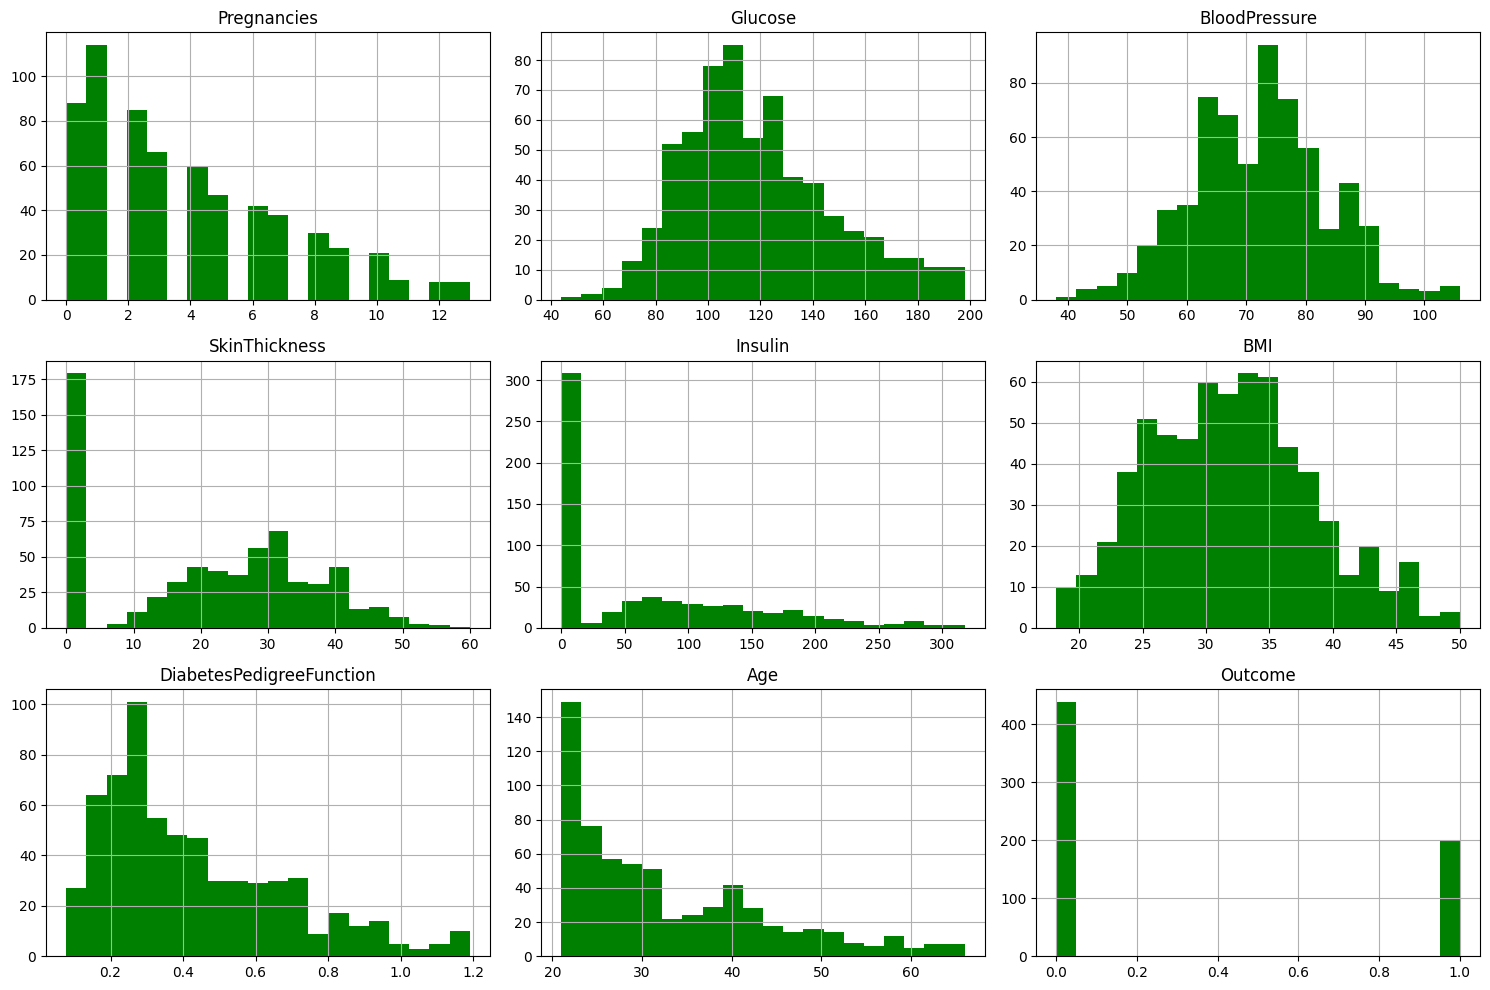

In [10]:
data_diabetes.hist(bins=20, figsize=(15, 10), color='green')
plt.tight_layout()
plt.show()

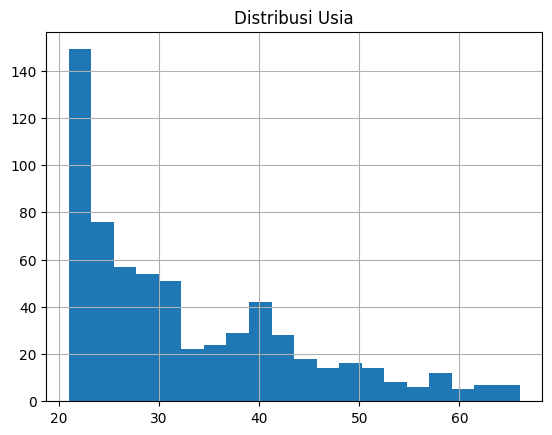

In [11]:
data_diabetes['Age'].hist(bins=20)
plt.title('Distribusi Usia')
plt.show()

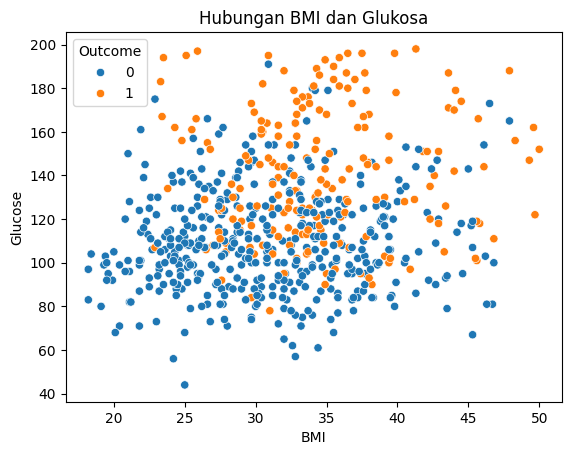

In [12]:
sns.scatterplot(data=data_diabetes, x='BMI', y='Glucose', hue='Outcome')
plt.title('Hubungan BMI dan Glukosa')
plt.show()

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_diabetes)
data_diabetes = pd.DataFrame(scaled_data, columns=data_diabetes.columns)

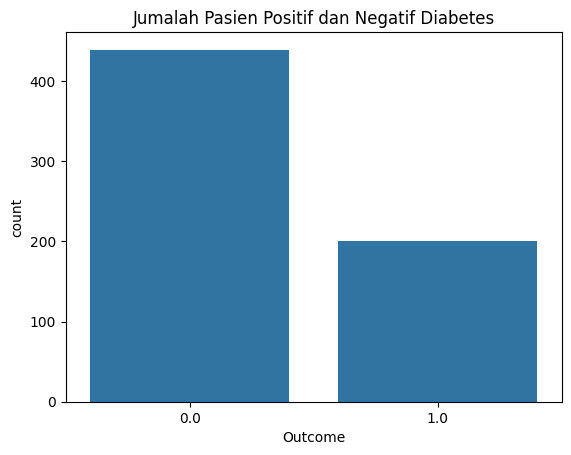

In [14]:
sns.countplot(x='Outcome', data=data_diabetes)
plt.title('Jumalah Pasien Positif dan Negatif Diabetes')
plt.show()

In [15]:
X = data_diabetes.drop('Outcome', axis=1)
y = data_diabetes['Outcome']

In [26]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(X_test)

In [29]:
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, R²: {r2}')

MSE: 0.13775970527705966, R²: 0.31852203766324105


In [30]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.31852203766324105


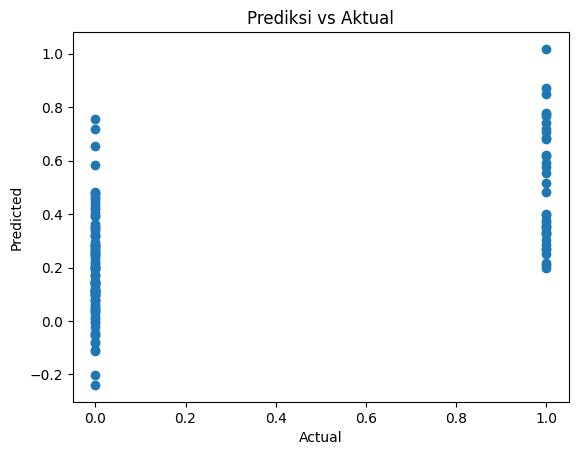

In [31]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Prediksi vs Aktual')
plt.show()

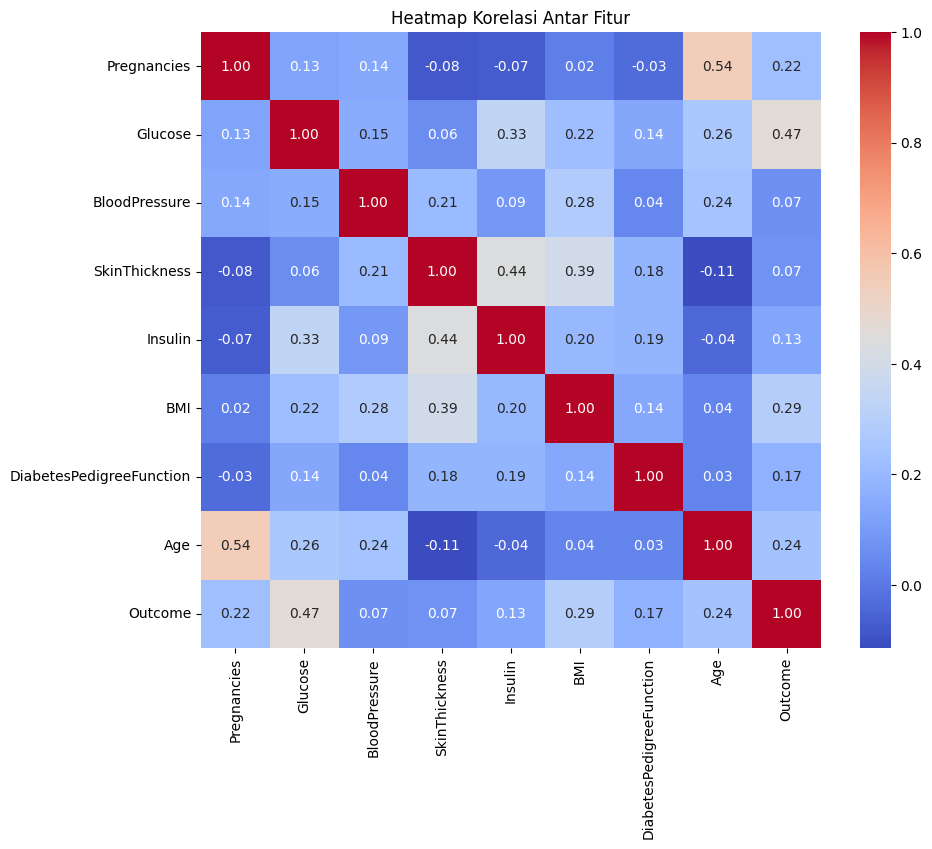

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_diabetes.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

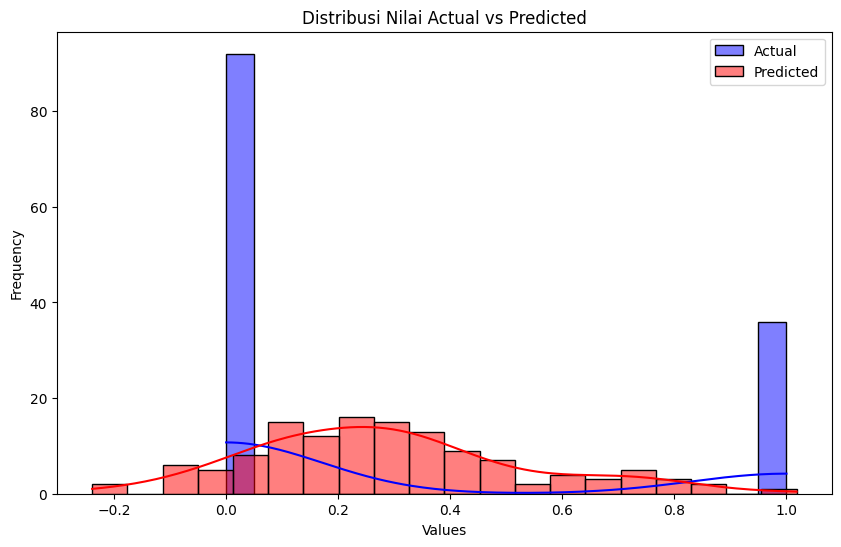

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Actual', kde=True, bins=20)
sns.histplot(y_pred, color='red', label='Predicted', kde=True, bins=20)
plt.title('Distribusi Nilai Actual vs Predicted')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

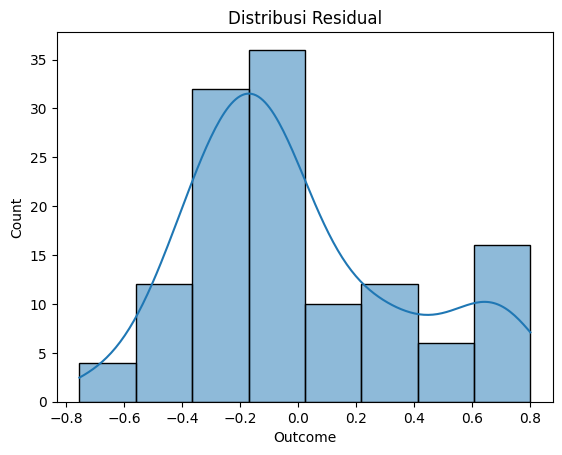

In [33]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Distribusi Residual')
plt.show()

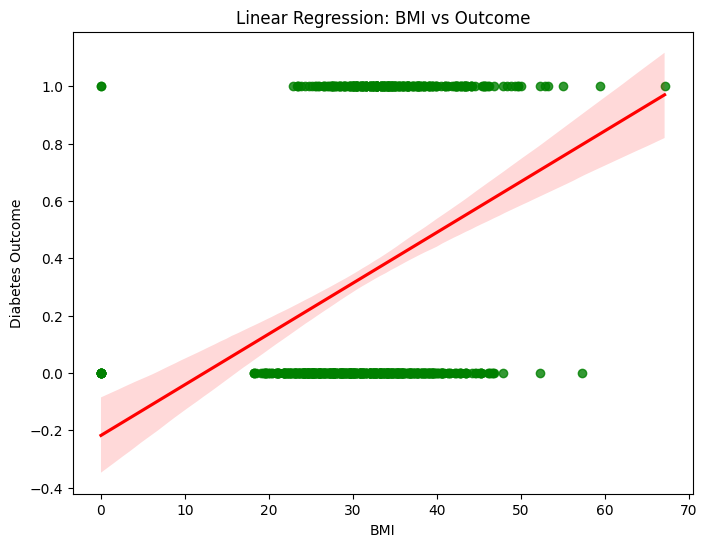

In [25]:
plt.figure(figsize=(8, 6))
sns.regplot(x=data_diabetes['BMI'], y=data_diabetes['Outcome'], color='green', line_kws={'color': 'red'})
plt.title('Linear Regression: BMI vs Outcome')
plt.xlabel('BMI')
plt.ylabel('Diabetes Outcome')
plt.show()

In [35]:
positive = data_diabetes[data_diabetes['Outcome'] == 1]
negative = data_diabetes[data_diabetes['Outcome'] == 0]

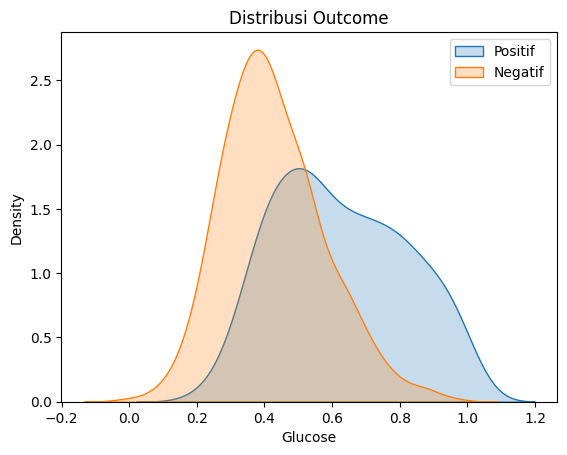

In [38]:
sns.kdeplot(positive['Glucose'], label='Positif', fill=True)
sns.kdeplot(negative['Glucose'], label='Negatif', fill=True)
plt.title('Distribusi Outcome')
plt.legend()
plt.show()